In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
np.random.seed(0)

In [23]:
data_dir = os.path.join(os.getcwd(), 'data')
nodes_path = os.path.join(data_dir, 'nodes.csv')
nodes = pd.read_csv(nodes_path)
print(nodes)
N = len(nodes)
print(N)

   id area       lat       lon  exists comment
0   0   A1  0.053854  0.258873    True  Acivte
1   1   A1  3.311649  2.997394   False     NaN
2   2   A1  9.441865  2.706503    True  Acivte
3   3   A1  4.435083  3.941700   False     NaN
4   4   A1  9.600167  3.018355   False     NaN
5   5   A2  3.964494  5.547912    True  Acivte
6   6   A2  7.669562  6.032776   False     NaN
7   7   A2  9.090400  9.983468   False     NaN
8   8   A1  9.160617  1.262492   False     NaN
9   9   A2  5.784274  8.574254    True  Acivte
10


In [24]:
eucledian_distance = lambda x1, y1, x2, y2: np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [25]:
distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        distance_matrix[i][j] = eucledian_distance(nodes.loc[i, "lat"], nodes.loc[i, "lon"], nodes.loc[j, "lat"], nodes.loc[j, "lon"])

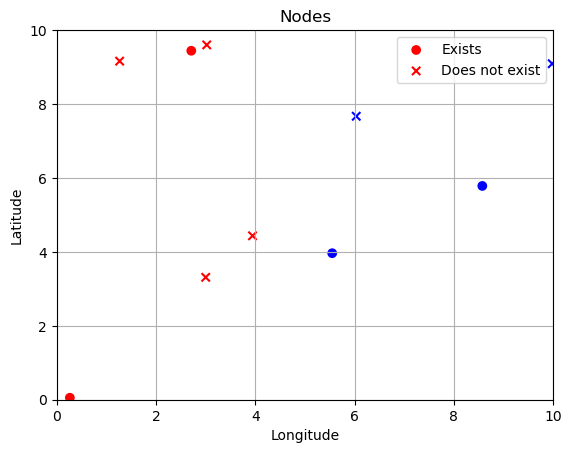

In [26]:
plt.figure()
area_to_color = {"A1": "red", "A2": "blue"}
colormap = np.array([area_to_color[area] for area in nodes["area"]])
plt.scatter(nodes[nodes["exists"]]["lon"], nodes[nodes["exists"]]["lat"], c=colormap[nodes["exists"]], marker="o", label="Exists")
plt.scatter(nodes[~nodes["exists"]]["lon"], nodes[~nodes["exists"]]["lat"], c=colormap[~nodes["exists"]], marker='x', label="Does not exist")
plt.title("Nodes")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.legend()
plt.show()

In [32]:
generators = pd.read_csv(os.path.join(data_dir, 'generators.csv'))

,desc,type,pmax,pmin,MC,CO2,node_id
0,Solar in A2,solar,95.320904,0.000000,5.686102,0.000000,6
1,Solar in A2,solar,66.000858,0.000000,6.917319,0.000000,4
2,Coal in A1,coal,374.530131,112.359039,25.470841,1.119219,7
3,Coal in A1,coal,291.225954,87.367786,29.668172,1.115496,8
4,Solar in A1,solar,60.665599,0.000000,7.591004,0.000000,6
5,Oil in A2,oil,142.468547,56.987419,61.225099,0.739073,3
6,Coal in A2,coal,223.506371,67.051911,30.347582,0.852827,4
7,Coal in A2,coal,313.084262,93.925279,23.665597,0.857939,3


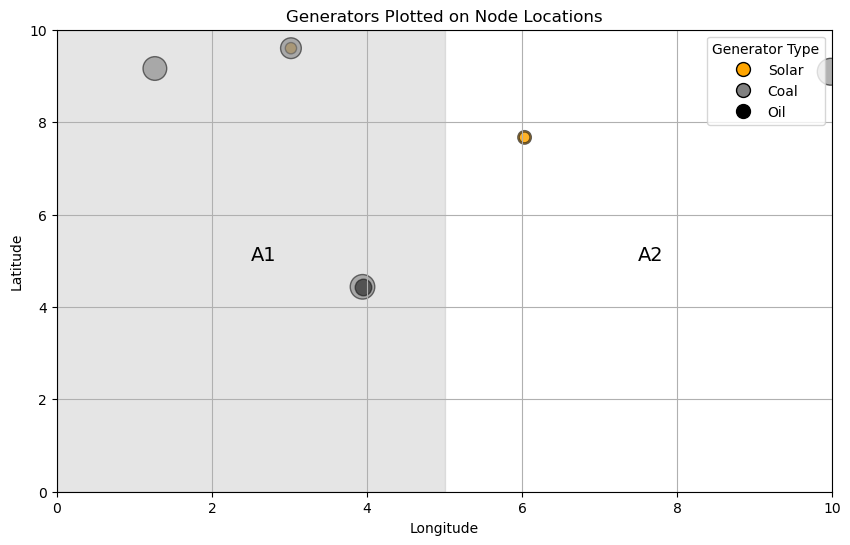

In [43]:
gen_with_location = pd.merge(generators, nodes, left_on="node_id", right_on="id")
import matplotlib.pyplot as plt

# Define a color map for generator types
color_map = {
    'solar': 'orange',
    'coal': 'gray',
    'oil': 'black'
}

# Map the color based on the generator type
gen_with_location['color'] = gen_with_location['type'].map(color_map)

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for each generator type
for gen_type, color in color_map.items():
    subset = gen_with_location[gen_with_location['type'] == gen_type]
    plt.scatter(subset['lon'], subset['lat'], 
                s=subset['pmax'],  # Circle size based on pmax
                color=color, label=gen_type.capitalize(), alpha=0.6, edgecolor="black")

plt.axvspan(xmin=0, xmax=5, color='gray', alpha=0.2)
plt.text(2.5, 5, 'A1', fontsize=14, color='black')  # A1 label (left side)
plt.text(7.5, 5, 'A2', fontsize=14, color='black')    # A2 label (right side)

# Labels, title, and grid
plt.title("Generators Plotted on Node Locations")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Create custom legend with same-sized circles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Solar', markersize=10, markerfacecolor='orange', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Coal', markersize=10, markerfacecolor='gray', markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Oil', markersize=10, markerfacecolor='black', markeredgecolor='black')
]

plt.legend(title="Generator Type", handles=handles)



# Display the plot
plt.show()
